In [8]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

# **Step 1: Prepare Data**

In [9]:
X_numpy, y_numpy = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=1)

# Convert into tensors
X = torch.from_numpy(X_numpy.astype(np.float32))
y = torch.from_numpy(y_numpy.astype(np.float32))
y = y.view(y.shape[0], 1)

In [10]:
n_samples, n_features = X.shape

# **Step 2: Create Model**

In [11]:
input_size = n_features
output_size = 1

# model
model = nn.Linear(input_size, output_size)

# **Step 3: Set Loss and Optimizer func**

In [12]:
# set learning rate
learning_rate = 0.01

# set loss and optimizer func
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# **Step 4: Train the Model**

In [15]:
EPOCHS = 100

for epoch in range(EPOCHS):
    # forward pass and loss
    y_pred = model(X)
    loss = criterion(y_pred, y)

    # backward pass
    loss.backward()

    # Update
    optimizer.step()
    optimizer.zero_grad()

    if (epoch + 1) % 10 == 0:
        print(f"epoch: {epoch + 1}, loss: {loss.item():.4f}")

epoch: 10, loss: 497.1084
epoch: 20, loss: 452.6245
epoch: 30, loss: 420.2013
epoch: 40, loss: 396.5573
epoch: 50, loss: 379.3082
epoch: 60, loss: 366.7188
epoch: 70, loss: 357.5273
epoch: 80, loss: 350.8141
epoch: 90, loss: 345.9095
epoch: 100, loss: 342.3252


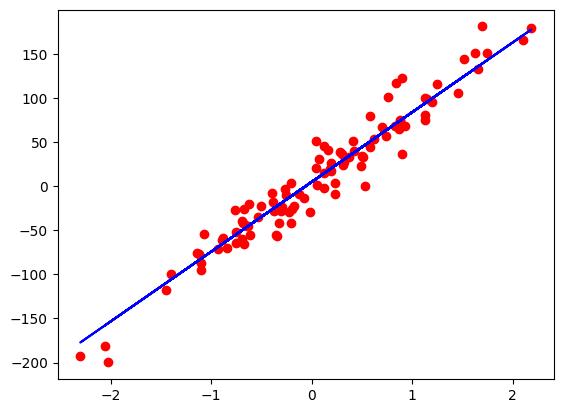

In [16]:
# create plot
predicted = model(X).detach().numpy()
plt.plot(X_numpy, y_numpy, 'ro')
plt.plot(X_numpy, predicted, 'b')
plt.show()